In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [12]:
np.random.randn(2)

array([ 1.31191451, -0.04236801])

In [13]:
class BanditArm:
    def __init__(self,m):
        self.m = m     #true val
        self.m_estimate = 0 # cal val
        self.N = 0 # no of curr sample evaluated
    def pull(self):
        return np.random.randn() + self.m
    def update(self,x):
        self.N+=1
        self.m_estimate = self.m_estimate + (x-self.m_estimate)*1.0/self.N

In [14]:
def run_exp(m_list,eps,N):
    bandit = [BanditArm(x) for x in m_list]
    optimal_j = np.argmax(m_list)
    cnt_suboptimal = 0 #count when our choice is not optimal
    reward = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if p<eps:
            j = np.random.choice(len(bandit))
        else:
            j = np.argmax([b.m_estimate for b in bandit])
        x = bandit[j].pull()
        bandit[j].update(x)
        if j != optimal_j:
            cnt_suboptimal+=1
        reward[i] = x
        
    cum_avg_rwd = np.cumsum(reward)/(np.arange(N)+1)
    
    #plot
    plt.plot(cum_avg_rwd)
    for x in m_list:
        plt.plot(np.ones(N)*x)
    plt.xscale('log')#bcz graph coverge very fast so for acknowledge very minute detail in graph we need log scale
    plt.show()
    
    for b in bandit:
        print(b.m_estimate)
    print("% suboptimal for epsilon = {}".format(eps),float(cnt_suboptimal)/N)
    return cum_avg_rwd

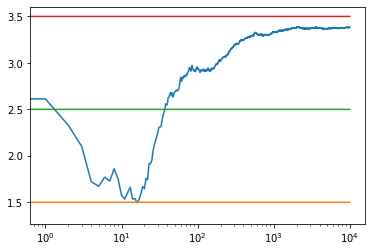

1.5470030950085727
2.4707871075275807
3.4937195984758396
% suboptimal for epsilon = 0.1 0.0743


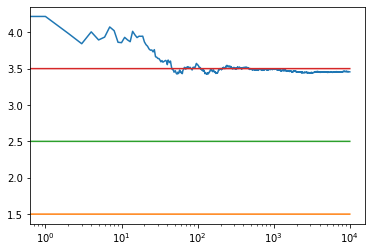

1.4819624746655407
2.542855066321743
3.5051615087359873
% suboptimal for epsilon = 0.05 0.033


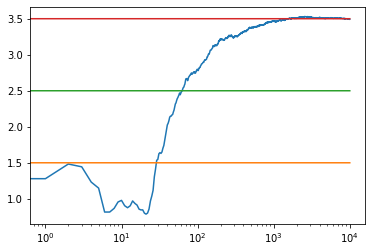

1.2480888711415266
2.6952764685944595
3.5077860937488
% suboptimal for epsilon = 0.01 0.0088


In [15]:
m_list = [1.5,2.5,3.5]
eps_list = [0.1,0.05,0.01]
reward_list = []
N = 10000
for x in eps_list:
    reward_list.append(run_exp(m_list,x,N))

## Log Scale

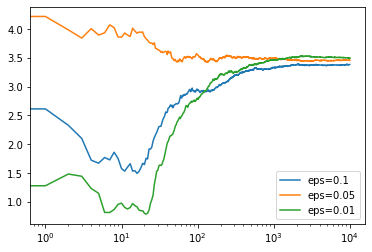

In [23]:
for i,x in enumerate(reward_list):
    plt.plot(x,label='eps={}'.format(eps_list[i]))
plt.legend()
plt.xscale('log')
plt.show()

## Linear SCale

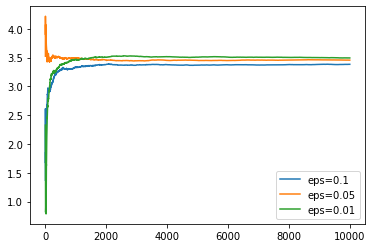

In [24]:
for i,x in enumerate(reward_list):
    plt.plot(x,label='eps={}'.format(eps_list[i]))
plt.legend()
plt.show()

## Trade off b/w epsilon and reward u can observe through these graph